### **CNN-1**

This notebook is for our first CNN model with minimal pre-processing.

Optimizer: ADAM

Batch Size: 64

Image Size: 64 x 64

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#import packages
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras as keras
from keras.layers.convolutional import Conv2D
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import Dropout

# To retrieve files/pathnames matching a specified pattern
import glob

import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

# Setting seed for reproducibiltiy
import random
SEED = 42
keras.utils.set_random_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [14]:
TRAIN_DIR = '/content/drive/MyDrive/ASL_Dataset/Train'
TEST_DIR = '/content/drive/MyDrive/ASL_Dataset/Test'

In [29]:
# Load all the images under each class (subdirectory)
def load_images(base_dir, directories_as_labels=True, files='**/*.jpg'):
  filenames = glob.glob(os.path.join(base_dir, files))

  # Load all the subdirectories as classes
  classes = (os.path.basename(os.path.dirname(name)) for name in filenames)
  df = pd.DataFrame(list(zip(filenames, classes)), columns=['path', 'label'])

  return df

train_df = load_images(TRAIN_DIR)
test_df = load_images(TEST_DIR)

In [30]:
batch_size = 64
image_size = 64
num_class = len(train_df['label'].unique())

In [31]:
# X_training data from a directory
# Sub-directory in that directory will be used as a class for each object
train_datagen = ImageDataGenerator(validation_split=0.3)

In [32]:
train_generator = train_datagen.flow_from_directory(
                        directory=TRAIN_DIR,
                        target_size=(image_size,image_size),
                        batch_size=batch_size,
                        class_mode='categorical',
                        color_mode='rgb',
                        subset='training',
                        shuffle=True)

Found 116101 images belonging to 28 classes.


In [33]:
val_generator = train_datagen.flow_from_directory(
                        directory=TRAIN_DIR,
                        target_size=(image_size,image_size),
                        batch_size=batch_size,
                        class_mode='categorical',
                        color_mode='rgb',
                        subset='validation',
                        shuffle=True)

Found 49728 images belonging to 28 classes.


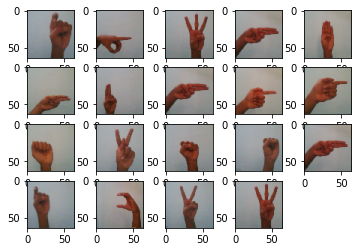

In [34]:
x_batch, y_batch = train_generator.next()

fig=plt.figure()
columns = 5
rows = 4
for i in range(1, columns*rows):
    num = np.random.randint(batch_size)
    image = x_batch[num].astype(np.int32)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
plt.show()

In [35]:
input_shape = [image_size,image_size,3]
output_shape = 28

input = Input(shape=(input_shape[0], input_shape[1],input_shape[2]))

conv2d_1 = Conv2D(64, kernel_size=4, strides=1, activation='relu')(input)
conv2d_2 = Conv2D(64, kernel_size=4, strides=2, activation='relu')(conv2d_1)
dout_1 = Dropout(0.5)(conv2d_2)

conv2d_3 = Conv2D(128, kernel_size=4, strides=1, activation='relu')(dout_1)
conv2d_4 = Conv2D(128, kernel_size=4, strides=2, activation='relu')(conv2d_3)
dout_2 = Dropout(0.5)(conv2d_4)

conv2d_5 = Conv2D(256, kernel_size=4, strides=1, activation='relu')(dout_2)
conv2d_6 = Conv2D(256, kernel_size=4, strides=2, activation='relu')(conv2d_5)

flatten = Flatten()(conv2d_6)

dout_3 = Dropout(0.5)(flatten)

dense_1 = Dense(512, activation='relu')(dout_3)

output = Dense(28, activation = 'softmax')(dense_1)

model = Model(input, output)

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 61, 61, 64)        3136      
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        65600     
                                                                 
 dropout (Dropout)           (None, 29, 29, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       131200    
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)       262272    
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 128)       0     

In [37]:
# Compile the model

model.compile(loss='categorical_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# Start the training process
history = model.fit(train_generator, validation_data= val_generator, epochs = 10)

Epoch 1/10
1815/1815 [==============================] - 29469s 16s/step - loss: 0.7250 - accuracy: 0.7755 - val_loss: 0.3245 - val_accuracy: 0.9107
Epoch 2/10
1815/1815 [==============================] - 720s 396ms/step - loss: 0.1418 - accuracy: 0.9544 - val_loss: 0.3539 - val_accuracy: 0.8851
Epoch 3/10
1815/1815 [==============================] - 711s 392ms/step - loss: 0.0909 - accuracy: 0.9721 - val_loss: 0.1998 - val_accuracy: 0.9448
Epoch 4/10
1815/1815 [==============================] - 717s 395ms/step - loss: 0.0640 - accuracy: 0.9813 - val_loss: 0.1677 - val_accuracy: 0.9536
Epoch 5/10
1815/1815 [==============================] - 705s 388ms/step - loss: 0.0640 - accuracy: 0.9825 - val_loss: 0.2136 - val_accuracy: 0.9578
Epoch 6/10
1815/1815 [==============================] - 688s 379ms/step - loss: 0.0461 - accuracy: 0.9877 - val_loss: 0.1363 - val_accuracy: 0.9658
Epoch 7/10
1815/1815 [==============================] - 685s 378ms/step - loss: 0.0533 - accuracy: 0.9870 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


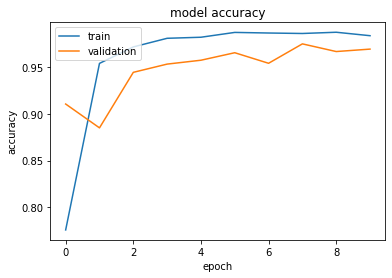

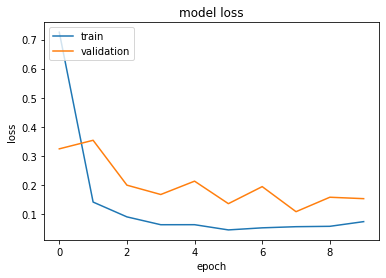

In [38]:
# Print learning curves

print(history.history.keys())

#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()